<a href="https://colab.research.google.com/github/pawar8787/homebrew-mit/blob/master/Financial_Analytics_P_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#READING DATA
data=pd.read_csv("Financial Analytics data.csv")
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [ ]:
#PRINTING INFORMATION OF THE DATAFRAME
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [ ]:
#PRINTING THE DESCRIPTION OF DATA IN DATAFRAME
data.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
count,488.000000,479.000000,365.000000,94.000000
mean,251.508197,28043.857119,4395.976849,1523.870106
std,145.884078,59464.615831,11092.206185,1800.008836
min,1.000000,3017.070000,47.240000,0.000000
25%,122.750000,4843.575000,593.740000,407.167500
50%,252.500000,9885.050000,1278.300000,702.325000
75%,378.250000,23549.900000,2840.750000,2234.815000
max,500.000000,583436.720000,110666.930000,7757.060000


In [ ]:
#CHECKING IF THERE ARE ANY NULL VALUES
data.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [ ]:
#COLUMN NAMES
data.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')

In [ ]:
#RENAMING COLUMN NAMES
data = data.rename(columns={'Name':'Company Name','Mar Cap - Crore': 'Market Capitalization', 'Sales Qtr - Crore': 'Quarterly Sales'})

In [ ]:
#DELETING COLUMN WITH NULL VALUES 
del data['Unnamed: 4']
data.head()

,S.No.,Company Name,Market Capitalization,Quarterly Sales
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [ ]:
#DROPPING THE NULL VALUES
data = data.dropna()

In [ ]:
#CHECKING IF THERE ARE ANY NULL VALUES LEFT
data.isnull().sum()

S.No.                    0
Company Name             0
Market Capitalization    0
Quarterly Sales          0
dtype: int64

In [ ]:
#MINIMUM VALUES
data.min()

S.No.                           1
Company Name             3M India
Market Capitalization     3017.07
Quarterly Sales             47.24
dtype: object

In [ ]:
#MAXIMAM VALUES
data.max()

S.No.                                499
Company Name             eClerx Services
Market Capitalization          583436.72
Quarterly Sales                110666.93
dtype: object

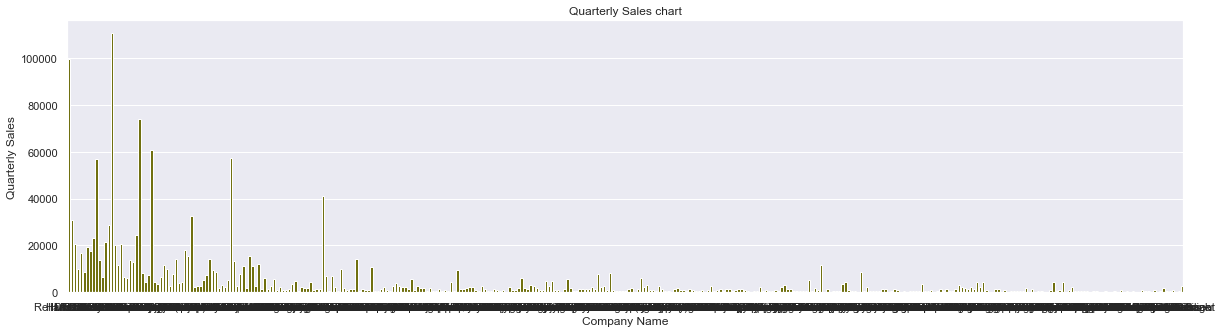

In [ ]:
#BARPLOT 
st=sns.barplot(x='Company Name',y='Quarterly Sales',data=data,color='olive')
st.set(xlabel='Company Name',ylabel='Quarterly Sales',title='Quarterly Sales chart')
sns.set (rc = {'figure.figsize':(20, 5)})

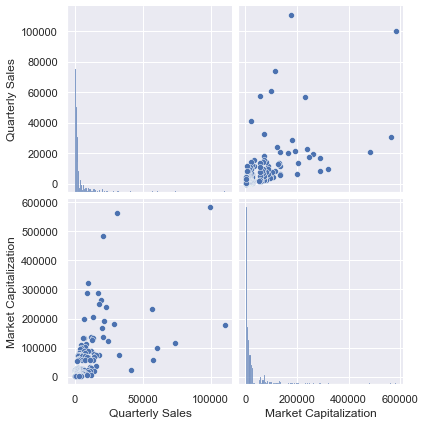

In [ ]:
#MULTIPLE GRAPHS
x=data[['Quarterly Sales','Market Capitalization']]
sns.pairplot(data = x, height = 3) 

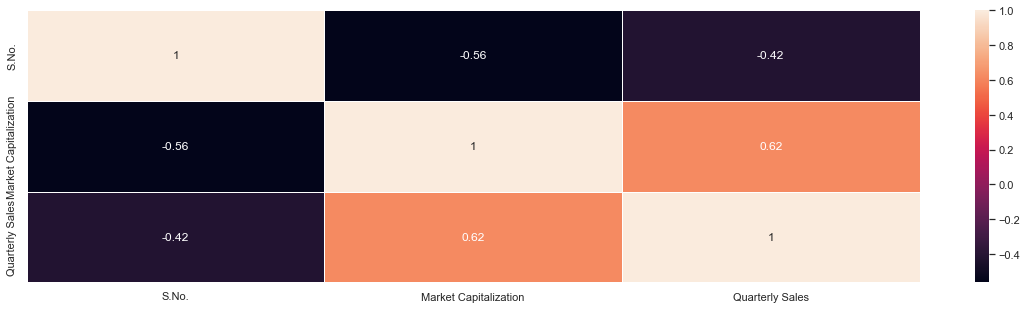

In [ ]:
#CORELATION GRAPH
dataplot = sns.heatmap(data.corr(), annot=True,linewidths=.5)
sns.set (rc = {'figure.figsize':(10, 10)})

In [ ]:
#REGRESSION
x = data[['Quarterly Sales']]
y = data['Market Capitalization']

In [ ]:
from sklearn import linear_model

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

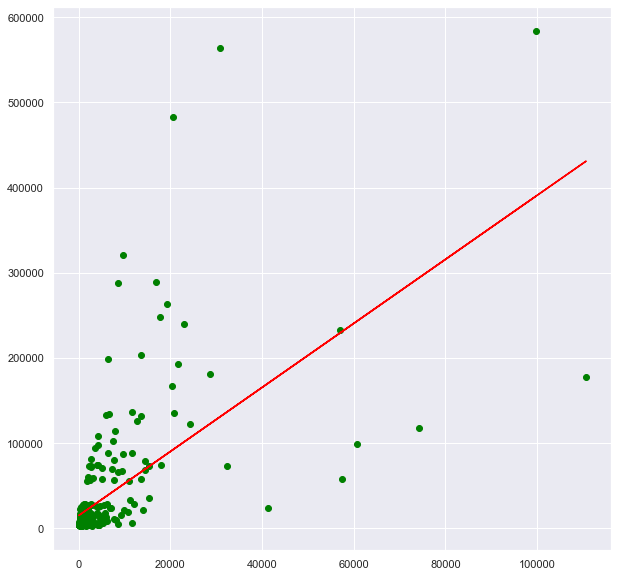

In [ ]:
#LINEAR REGRESSION
from scipy import stats

x = data['Quarterly Sales']
y = data['Market Capitalization']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y,color="green")
plt.plot(x, mymodel,color="red")
plt.show()